# COGS 108 - Final Project 

# Overview

Our project investigates the ways in which various environmental factors influence the size of a fire, and whether fire size can in fact be predicted by these observations. We began our analysis by looking at fires in California between 2010-2015 as it was the most reliable weather data. Using linear regression and classification, a model for prediction was built. We fail to reject our hypothesis since based off of classification almost all environmental factors predicted similar percentages correctly. The performance of our model was poor as our regression anaylsis had a very poor R^2 value and our classification would at best be able to predict the correct size half the time. The factors that we highlighted were not enough to predict the size of a fire. 


# Names

- Anson Lee
- Vikram Kelkar
- Ana Boisvert

# Research Question

What environmental factor has the biggest impact the size of a fire in California?

## Background and Prior Work

The recent headlines of wildfires raging across California have brought a heightened sense of awareness concerning the root causes of wildfires. Due to climate change, hotter and drier climates are resulting in longer “fire seasons” (1). Peak fire season occurs in the Autumn in california, as a result of fast offshore winds that spread hot embers into large fires. These fires are so powerful that they produce winds of their own (2). High temperatures encourage the spread of fire as well, making for a deadly combination. It is crucial to look at precipitation and humidity, because these elements may decrease the severity and spread of wildfires once they begin, and prevent their occurrence in the first place. However there are a multitude of other factors beyond temperature, wind speed, and precipitation that may impact the size and duration of a fire. According to an online article, the size and spread of fires may also be influenced by soil temperature, air pressure, and humidity amongst other variables. (3) In an article by U.S News, it is shown that recent fires in California have expanded tens of thousands of acres in just a few hours (4). With wildfires increasing in size and damage every year, it is vital for more precautionary measures to be taken.

Other projects have attempted to make predictions about fires based on environmental conditions. As seen on Kaggle, Chelsea Zaloumis created a classifier to accurately predict probability for fire given environmental condition features (5). This project addresses fire risk, while our project will address the size, and primary factors that contribute to the growth of a fire once it has already begun. Specifically, we will attempt to find the environmental condition that most strongly contributes to the proliferation of wildfires.

We have compounded a list of 14 separate weather features that we will  examine in our project for their correlation to the final size of the fire. They are listed below along with their abbreviations. 
- ETo - reference crop evapotranspiration in inches
- Precip - Precipitation in inches
- Sol Rad (Ly/day) - solar radiation in Langleys per day
- Avg Vap Pres - Average vaporization pressure measured in mBars
- Min Air Temp - Minimum air temperature in Fahrenheit
- Max Air Temp - Maximum air temperature in Fahrenheit
- Avg Air Temp - Average air temperature in Fahrenheit
- Max Rel Hum - Maximum relative humidity percentage
- Min Rel Hum - Minimum relative humidity percentage
- Avg Rel Hum - Average relative humidity percentage
- Dew Point - Dew point in Fahrenheit
- Avg Wind Speed - Average wind speed in miles per hour
- Wind Run - “Amount” of wind that passes through the station in an hour, measured in miles
- Avg Soil Temp - Average temperature of the soil in Fahrenheit
    
As residents of The Golden State, we want to investigate the common factors that lead up to wildfires and correlate them with the severity of the resulting fire. In particular, we would like to know how these factors impact the size and duration of the wildfire. With an understanding of the factors leading to fire in California, the ability to predict fires will become possible.


1. Home | Smokey Bear. (n.d.). Retrieved from smokeybear.com website: https://smokeybear.com/en
2. Singh, M. (2020, August 22). California’s wildfires explained: how did they start – and is this normal? The Guardian. Retrieved from https://www.theguardian.com/us-news/2020/aug/21/california-wildfires-explained-q-and-a-weather-smoke
3. Associated Press. (2020). California Wildfires Growing Bigger, Moving Faster Than Ever. Retrieved from US News & World Report website: https://www.usnews.com/news/us/articles/2020-09-10/california-wildfires-growing-bigger-moving-faster-than-ever
4. California Environmental Conditions Dataset. (n.d.). Retrieved December 15, 2020, from kaggle.com website: https://www.kaggle.com/chelseazaloumis/cimis-dataset-with-fire-target


# Hypothesis


Of the environment factors available in the study, counties in California with lower rainfall are at an increased risk of larger and more severe wildfires. Lower rainfall leads to more arid terrain. 

# Dataset(s)


- Dataset Name: 1.88 Million US Wildfires: 24 Years of Geo-Referenced Wildfire Records
- Source: https://www.kaggle.com/rtatman/188-million-us-wildfires
- Number of observations: 1,880,000 (we used a 44,128 subset of the  data pertaining to California)
- This dataset documents all recorded wildfires in the U.S. from 1992 to 2015. Features extracted from the dataset include latitude and longitude of the origin of the fire, dates on which the fire was reported and contained, and final acres burned by the fire. We used this data to gauge the impact of each fire.



- Dataset Name: CIMIS Environmental Conditions
- Source: https://cimis.water.ca.gov/WSNReportCriteria.aspx#
- Number of observations: 220,642
- California Irrigation Management Information Systems (CIMIS) allows users to download the daily environmental conditions associated with each weather station within California. These datasets contain daily temperature, precipitation, humidity, wind speed, . We downloaded daily environmental conditions from all active weather stations in california from the years of 2010-2015. 



- Dataset Name: California Weather Stations to Coordinates
- Source: Scrapped from https://cimis.water.ca.gov/Stations.aspx?t=1
- Number of observations: 169
- We created this dataset ourselves by assigning each active weather station its own latitude and longitude.

We have combined these two datasets by creating a function that maps the latitude and longitude of a fire to its nearest weather station. This allows us to match each fire with accurate daily weather conditions so we may investigate the relationship between the fire data and environmental conditions.


# Setup

In [1]:
import pandas as pd
import math
import sqlite3
from random import sample
from collections import defaultdict
import collections

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

import datetime 
from datetime import datetime as dt

from sklearn.neighbors import KDTree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# Pre-Analysis Visualizations

Our group created pre-analysis visualizations to show the relationship between environmental conditions and fire data in order to show the underlying assumptions in our chosen datasets.


### CIMIS Weather Station Dataset

The first dataset to load is the weather dataset taken from the California Irrigation Management Information System (CIMIS) from the California Department of Water Resources. When downloading historical data, their website limited the size of each download. Since we wanted daily weather data accross all weather stations from 2010 to 2015, we had to separate the download into 23 different CSV files that we pieced together below.

Since each weather station operates independently of each other, some became active during the 2010-2015 period while others became inactive during the same period. We threw out these datapoints with the dropna() method.

In [2]:
#create DataFrame for weather conditions
columns = ['Stn Id','Stn Name','CIMIS Region','Date','Jul','ETo (in)','Precip (in)','Sol Rad (Ly/day)','Avg Vap Pres (mBars)','Max Air Temp (F)','Min Air Temp (F)','Avg Air Temp (F)','Max Rel Hum (%)','Min Rel Hum (%)','Avg Rel Hum (%)','Dew Point (F)','Avg Wind Speed (mph)','Wind Run (miles)','Avg Soil Temp (F)']
df_weatherData = pd.DataFrame(columns = columns)

for i in range(23):
    curr_df = pd.read_csv(f"data/weather/daily ({i}).csv", usecols=columns)
    df_weatherData = df_weatherData.append(curr_df)
    
#print weater conditions DataFrame
df_weatherData = df_weatherData.dropna()
print(f"Number of weather reports loaded: {len(df_weatherData)}")
df_weatherData.head()

Number of weather reports loaded: 220642


,Stn Id,Stn Name,CIMIS Region,Date,Jul,ETo (in),Precip (in),Sol Rad (Ly/day),Avg Vap Pres (mBars),Max Air Temp (F),Min Air Temp (F),Avg Air Temp (F),Max Rel Hum (%),Min Rel Hum (%),Avg Rel Hum (%),Dew Point (F),Avg Wind Speed (mph),Wind Run (miles),Avg Soil Temp (F)
0,2,FivePoints,San Joaquin Valley,1/1/2010,1,0.02,0.0,141.0,8.0,57.3,29.8,39.0,100.0,72.0,99.0,38.8,1.4,33.4,50.5
4,2,FivePoints,San Joaquin Valley,1/5/2010,5,0.00,0.0,65.0,6.6,43.3,17.5,32.5,100.0,91.0,100.0,33.9,2.2,53.0,50.8
5,2,FivePoints,San Joaquin Valley,1/6/2010,6,0.01,0.0,92.0,7.3,45.2,28.8,37.5,100.0,86.0,96.0,36.6,1.6,38.9,50.7
6,2,FivePoints,San Joaquin Valley,1/7/2010,7,0.02,0.0,129.0,6.5,49.5,19.2,32.4,100.0,83.0,100.0,33.5,2.0,48.6,50.1
11,2,FivePoints,San Joaquin Valley,1/12/2010,12,0.03,0.0,131.0,11.4,68.0,32.0,59.3,98.0,49.0,66.0,47.9,7.1,170.9,51.2


In [3]:
# Add "Month" column to dataframe for visualization
df_weatherData_vis = df_weatherData.copy()
df_weatherData_vis['Month'] = pd.to_datetime(df_weatherData_vis['Date']).dt.to_period('M')

# Reduce DataFrame to columns being used for visualization
df_weatherData_vis = df_weatherData_vis[['Avg Air Temp (F)','Precip (in)', 'Avg Wind Speed (mph)','Month', 'CIMIS Region']]

In [4]:
df_weatherData_vis.groupby('Month').mean()

# created function to update 'Month' column to exclude year 
def convert_to_month(date_in_some_format):
    date_as_string = str(date_in_some_format)  # cast to string
    month_as_string = date_as_string[-2:] # last four characters
    return int(month_as_string)

# apply function
df_weatherData_vis['Month'] = df_weatherData_vis['Month'].apply(convert_to_month)

#create DataFrame that displays average temperature, precipitation, and wind speed per month
df_weatherhist = df_weatherData_vis.groupby('Month').mean()

montharray = ['1','2','3','4','5','6','7','8','9','10', '11','12']

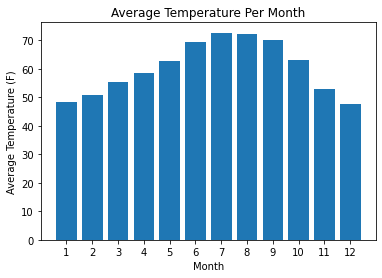

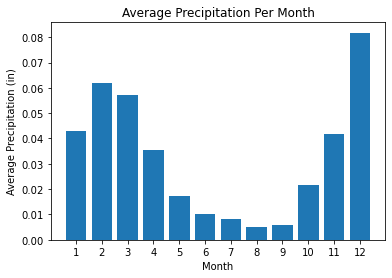

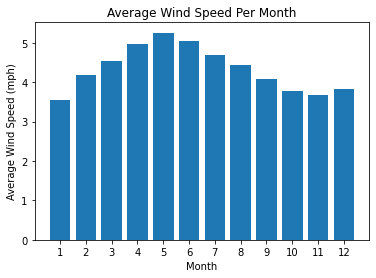

In [5]:
#plot average temperature per month
plt.bar(montharray, df_weatherhist['Avg Air Temp (F)'])
plt.title('Average Temperature Per Month')
plt.xlabel('Month')
plt.ylabel('Average Temperature (F)')
plt.show()

#plot average precipitation per month
plt.bar(montharray, df_weatherhist['Precip (in)'])
plt.title('Average Precipitation Per Month')
plt.xlabel('Month')
plt.ylabel('Average Precipitation (in)')
plt.show()

#plot average wind speed per month
plt.bar(montharray, df_weatherhist['Avg Wind Speed (mph)'])
plt.title('Average Wind Speed Per Month')
plt.xlabel('Month')
plt.ylabel('Average Wind Speed (mph)')
plt.show()

Average Temperature Per Month: This histogram demonstrates that the months with highest average temperatures in California are June, July, August, and September, with the warmest month being July. 

Average Precipitation Per Month: This histogram shows that there is an inverse relationship between rainfall and average temperature. The months receiving the least amount of rain are June, July, August and September once again, with August having the least rainfall. 

Average Wind Speed Per Month: Average windspeed per month has a more unclear relationship to precipitation and temperature, as the highest windspeeds occur in April, May, June and July. 

It is clear that June and July are the months wherein all three environmental factors contain extremes. There are high wind speeds, high temperatures, and low precipitation. This combination of factors should yield larger and more deadly fires and would back our hypothesis. 


## Weather Stations Map

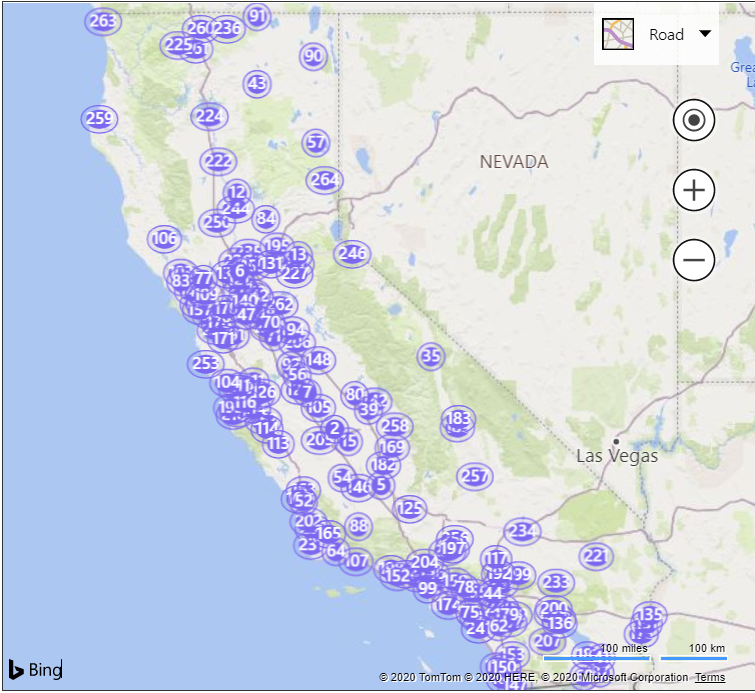

### Wildfire Dataset

The original dataset for wildfires came from Kaggle and contained 1.88 million datapoints on US wildfires from 1992 to 2015. This dataset contains information such as identification for each fire, coordinates for the point location of the fire, state and county of origin, discovery and termination dates, etc. 

From this original dataset, we utilized a subset of fires that originated from California in the years 2010 to 2015 as exemplified in the SQL query below. Since we are trying to map weather data to the severity of the fire, the only fields we were interested in from the fire dat was the discovery date of the fire (DISCOVERY_DATE), containment date (CONT_DATE), acres burned (FIRE_SIZE), and coordinates of the origin (LATITUDE/LONGITUDE).

In [6]:
#load fire data into an array fire_data
conn = sqlite3.connect('data/FPA_FOD_20170508.sqlite')
cur = conn.cursor()

cur.execute("""
    SELECT datetime(DISCOVERY_DATE), datetime(CONT_DATE), FIRE_SIZE, LATITUDE, LONGITUDE  
    FROM Fires 
    WHERE state = "CA" AND FIRE_YEAR >= 2010 AND FIRE_YEAR <= 2015
""")

fire_data = cur.fetchall()
print(f"Loaded {len(fire_data)} rows of California fire data")
print(fire_data[0])       # First fire datapoint is missing a containment date
print(fire_data[3000])

Loaded 44128 rows of California fire data
('2010-05-19 00:00:00', None, 70.0, 36.76694444, -121.30305555)
('2010-06-17 00:00:00', '2010-06-17 00:00:00', 0.1, 35.7497, -118.1297)


In [7]:
# create dataframe to hold fire_data
df_fire = pd.DataFrame(fire_data, columns = ['DISCOVERY_DATE','CONT_DATE', 'FIRE_SIZE', 'LAT', 'LONG'])

# drop columns not helpful for visualization
df_fire = df_fire[['DISCOVERY_DATE', 'FIRE_SIZE']]

In [8]:
# Add "Month" column to dataframe for visualization 
df_fire['Month'] = pd.to_datetime(df_fire['DISCOVERY_DATE']).dt.to_period('M') 

# created function to update 'Month' column to exclude year 
def convert_to_month(date_in_some_format):
    date_as_string = str(date_in_some_format)  # cast to string
    month_as_string = date_as_string[-2:] # last four characters
    return int(month_as_string)

# apply function
df_fire['Month'] = df_fire['Month'].apply(convert_to_month)

#create DataFrame that displays average temperature, precipitation, and wind speed per month
df_fireavg = df_fire.groupby('Month').mean()

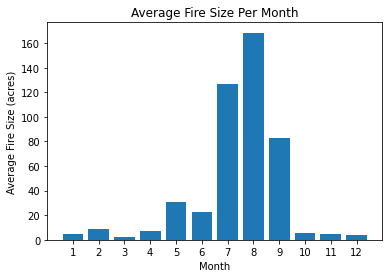

In [9]:
# plot average fire size per month
plt.bar(montharray, df_fireavg['FIRE_SIZE'])
plt.title('Average Fire Size Per Month')
plt.xlabel('Month')
plt.ylabel('Average Fire Size (acres)')
plt.show()

Average Fire Size Per Month: 
This histogram indicates that the largest fires occur in the months of July, August, and September, with the greatest amount occurring in August by a significant amount. This inversely correlates to precipitation, meaning the month of August has the largest number of fires and least rainfall. Furthermore, August falls within the range of the months with the highest temperatures and windspeeds

As seen with the previous graphs as well, by isolating by month we can get a clearer picture at the trends of these weather patterns and the months that have larger average fires. These pre-visualizations so far are showing that there are clear differences in fire size by month and the changes in weather could be the key. 


In [10]:
# create function to classify fire size into A-G categories 

def FindFireClass (size):
    if size < .25:
        firesizeclass = 'A'
    elif size < 9.9:
        firesizeclass = 'B'
    elif size < 99.9:
        firesizeclass = 'C'
    elif size < 299.9:
        firesizeclass = 'D'
    elif size < 999:
        firesizeclass = 'E'
    elif size < 4999:
        firesizeclass = 'F'
    else:
        firesizeclass = 'G'
    return firesizeclass

In [11]:
# apply function
df_fire['Fire Size Class'] = df_fire['FIRE_SIZE'].apply(FindFireClass)

# create DataFrame that counts the amount of fires per month within a specific fire size class 
df_fireclass = df_fire.groupby(['Fire Size Class', 'Month']).count()

letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
df_fireclass = df_fireclass.drop(columns=['DISCOVERY_DATE'])

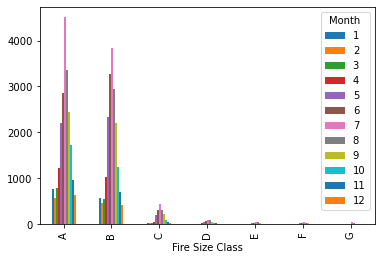

In [12]:
#reset index in order to graph
df_fireclass = df_fireclass.reset_index(level=[0,1])

# graph fireclass
df_fireclass.pivot("Fire Size Class", "Month", "FIRE_SIZE").plot(kind='bar')

This graph shows the number of fires within the classifications A-G that occur per month. It is clear that fires with size less than .25 acres (group A), between .25 and 9.9 acres (group B), and between 19.9 and 99.9 acres  (group C) have the greatest number of fires in July. Additionally, fires between 1,000 and 4,999 acres are more likely to be in July as well. This, in combination with the Average Fire Size Per Month graph, shows that the greatest number of fires occur in July while the largest fires occur in August. 


# Data Cleaning

## Part 1 - Creating mappings
Pre-defined mappings constants for feature to index. These will be used later when cleaning and utilizing their respective datasets.

In [13]:
# Define usefull features from the fire dataset and their respective indices
fire_mapping = {
    'start_date': 0,
    'end_date': 1,
    'size': 2,
    'lat': 3,
    'long': 4
}

In [14]:
# Define useful features from the weather dataset and their respective indices
weather_to_idx = {
    'ETo (in)': 0,
    'Precip (in)': 1,
    'Sol Rad (Ly/day)': 2,
    'Avg Vap Pres (mBars)': 3, 
    'Max Air Temp (F)': 4,
    'Min Air Temp (F)': 5,
    'Avg Air Temp (F)': 6,
    'Max Rel Hum (%)': 7,
    'Min Rel Hum (%)': 8,
    'Avg Rel Hum (%)': 9,
    'Dew Point (F)': 10,
    'Avg Wind Speed (mph)': 11,
    'Wind Run (miles)': 12,
    'Avg Soil Temp (F)': 13
}

idx_to_weather = {v: k for k, v in weather_to_idx.items()}

The next mapping comes from dataset that we created from the CIMIS website to connect the wildfire datapoints to their respective weather station. This was done by creating mapping of CIMIS weather station ID's to their latitude and longitude coordinates of each station. This dataset was created by hand-labeling the 200 weather stations to their coordinates on a spreadsheet, then downloading the spreadsheet into a CSV.

In [15]:
# Station to coordinate (lat/long) mappings
df_stationToCoord = pd.read_csv('data/station to coordinates.csv')

In [16]:
df_stationToCoord.head()

,Station ID,Lat,Long
0,2,36.336222,-120.11291
1,5,35.532556,-119.28179
2,6,38.535694,-121.77636
3,7,36.851222,-120.59092
4,12,39.608639,-121.82443


## Part 2 - Merging the Data
Since we have three different datasets that were loaded in the above section, this section will merge the wildfire data and the weather station data by assigning the nearest daily weather datapoint to the fire.

Originally, we determined the closest weather station by simply choosing the weather station with the smallest euclidean distance from the fire. However, this approach was extremely slow (took upwards of 3 hours). To speed up the process, SKLearn's KDTree was used to find the k-nearest stations geographically, then we go through the k stations and find the closest one that is active. In this instance, we found that using the 20-nearest stations was a good balance between guaranteeing that at least one station was active and runtime efficiency (takes about 40 minutes to run).

For this project, we need the data in the following two forms: 
<ol>
    <li>Weather data for the first day of the fire </li>
    <li>Weather data averaged over all days of the fire </li>
</ol>

### 2.1 First-day Data Cleaning
For first-day analysis, we are trying to predict the size of the fire strictly from the weather conditions on the first day of the fire. Since all fire datapoints have a discovery date, the entire fire dataset can be used for first-day based predictions.

Below, a KDTree is created to help speed up the "find closest weather station" operation. This data structure improved our runtime in the findClosestStationData and findClosestStationAvgData methods from n<sup>2</sup> to n<em>log</em>(n).

In [17]:
# Construct a KDTree for the coordinates of the weather stations
coords = []
stations = []

for _, c in df_stationToCoord.to_dict('index').items():
    coords.append([c['Lat'], c['Long']])
    stations.append(c['Station ID'])

coords = np.asarray(coords)

coords_tree = KDTree(coords, leaf_size=20)

In [18]:
# Find closest station to the lat/long cooridinates on a given date
def findClosestStationData(lat, long, date):
    dist, indices = coords_tree.query([[lat, long]], k=20)
    
    # Iterate over each of the 20 closest stations and find the closest active station
    for i in range(len(indices[0])):
        idx = indices[0][i]
        
        station = stations[idx]
        stationInfo = df_weatherData.loc[(df_weatherData['Stn Id'] == station) & (df_weatherData['Date'] == date)]
        if len(stationInfo) != 0:
            res = [0] * 14
            
            for param in weather_to_idx:
                res[weather_to_idx[param]] = stationInfo.iloc[0][param]
                
            return res, dist[0][i]

Here, we create a the merged dataset for wildfires and nearest daily weather report. This dataset will be used for the single-day predictions.

In [19]:
# Create data for day-1 weather conditions
data = []
distances = []

for i in range(len(fire_data)):
    fire = fire_data[i]
    lat = fire[fire_mapping['lat']]
    long = fire[fire_mapping['long']]
    date = fire[fire_mapping['start_date']]
    date = f"{date[5:7] if date[5]!='0' else date[6]}/{date[8:10] if date[8] != '0' else date[9]}/{date[:4]}"

    info, dist = findClosestStationData(lat, long, date)
    
    distances.append(dist)
    data.append(info)

In [20]:
print(len(data))
print(f"Average distance to closest active station: {sum(distances) / len(distances)} degrees")

44128
Average distance to closest active station: 0.7853511701977343 degrees


### 2.2 Multiday Data Cleaning
For multi-day analysis, we are trying to predict the final size of the fire based on the average weather conditions of all days of the fire. However, since 39.70% of the dataset is missing a  containment-date and 84.82% of the fires with containment-dates are single-day fires, we decided to remove these fires from the dataset for a multi-day model.

In [21]:
# Show statistics about missing data
a = 0
b = 0

a1 = 0
b1 = 0

for fire in fire_data:
    if fire[1] == None:
        a += fire[fire_mapping['size']]
        a1 += 1
    else:
        b += fire[fire_mapping['size']]
        b1 += 1
    
print(f"Percentage of fires without end dates: {a1 / (a1+b1)}")
print(f"Average acres burned for fires missing end dates: {a/a1}")
print(f"Average acres burned for fires with end dates: {b/b1}")

Percentage of fires without end dates: 0.39698150833937634
Average acres burned for fires missing end dates: 23.74435277999723
Average acres burned for fires with end dates: 99.17567493425405


In [22]:
# Get fires with end dates that lasted multiple days
fire_data_shorten = []           # Fires with start and end dates
notMissing = 0

for fire in fire_data:
    if fire[1] != None:
        curr = dt.strptime(fire[fire_mapping['start_date']], '%Y-%m-%d %H:%M:%S')
        end = dt.strptime(fire[fire_mapping['end_date']], '%Y-%m-%d %H:%M:%S')

        delta = end - curr
        if delta.days != 0:
            fire_data_shorten.append(fire)
        notMissing += 1
        
print(f"Number of fires with end dates: {notMissing}")
print(f"Number of fires with end dates that lasted multiple days: {len(fire_data_shorten)}")

Number of fires with end dates: 26610
Number of fires with end dates that lasted multiple days: 4039


In [23]:
# Get average weather data for closest station over a multiday period
one_day = datetime.timedelta(days=1)

def findClosestStationAvgData(lat, long, start_date, end_date):
    num_days = (end_date-start_date).days + 1
    dist, indices = coords_tree.query([[lat, long]], k=20)
    
    curr = f"{start_date.month}/{start_date.day}/{start_date.year}"   
        
    res = None
    
    # Generate an array of dates within the start_date and end_date range
    dates = []
    while start_date <= end_date:
        dates.append(f"{start_date.month}/{start_date.day}/{start_date.year}")
        start_date += one_day
        
    # Iterate over each of the 20 closest stations and find the closest active station
    for i in range(len(indices[0])):
        idx = indices[0][i]
        
        station = stations[idx]
        stationInfo = df_weatherData.loc[(df_weatherData['Stn Id'] == station) & (df_weatherData['Date'].isin(dates))]
        if len(stationInfo) != 0:
            res = [0] * 14
            
            for _, daily_data in stationInfo.iterrows():
                for param in weather_to_idx:
                    res[weather_to_idx[param]] += daily_data[param]
                    
            return [val/len(stationInfo) for val in res], dist[0][i]

Here, we use the findClosestStationAvgData to create a dataset persisting only of fires that lasted mutiple days.

In [24]:
# Get weather data for average over duration of the fire from closest weather station
data_shorten = []
distances = []

for fire in fire_data_shorten:
    start = dt.strptime(fire[fire_mapping['start_date']], '%Y-%m-%d %H:%M:%S')
    end = dt.strptime(fire[fire_mapping['end_date']], '%Y-%m-%d %H:%M:%S')
    
    info, dist = findClosestStationAvgData(fire[fire_mapping['lat']], fire[fire_mapping['long']], start, end)
    
    distances.append(dist)
    data_shorten.append(info)

# Data Analysis & Results

Create the labels for fire classes. Classes are defined according National Wildfire Coordinating Group's classification of wildfires by size. The classes are as follows:
<ul>
    <li> Class A - one-fourth of an acre or less </li>
    <li> Class B - more than one-fourth of an acre, but less than 10 acres </li>
    <li> Class C - 10 acres or more, but less than 100 acres </li>
    <li> Class D - 100 acres or more, but less than 300 acres </li>
    <li> Class E - 300 acres or more, but less than 1,000 acres </li>
    <li> Class F - 1,000 acres or more, but less than 5,000 acres </li>
    <li> Class G - 5,000 acres or more </li>
</ul>

In [25]:
# Get Acres burned as the label for start-date model
labels_reg = []
labels_class = []
firesizeclass = defaultdict(int)

for i in range(len(fire_data)):
    fire = fire_data[i]
    labels_reg.append(fire[fire_mapping['size']])
    size = fire[fire_mapping['size']] 
    if size < .25:
        firesizeclass['A'] += 1
        labels_class.append('A')
    elif size < 9.9:
        firesizeclass['B'] += 1
        labels_class.append('B')
    elif size < 99.9:
        firesizeclass['C'] += 1
        labels_class.append('C')
    elif size < 299.9:
        firesizeclass['D'] += 1
        labels_class.append('D')
    elif size < 999:
        firesizeclass['E'] += 1
        labels_class.append('E')
    elif size < 4999:
        firesizeclass['F'] += 1
        labels_class.append('F')
    else:
        firesizeclass['G'] += 1
        labels_class.append('G')

print(firesizeclass)           # Shows key-value pairs of class to number of fires in class

defaultdict(<class 'int'>, {'C': 1728, 'B': 19548, 'A': 22056, 'D': 401, 'E': 186, 'F': 121, 'G': 88})


In [26]:
# Split into training and test set (80% train, 20% test) for start-date model
size = int(len(labels_reg) * .8)
train_indices = sample(range(len(labels_reg)), size)

train_X = np.take(data, train_indices, axis=0)
test_X = np.delete(data, train_indices, axis=0)

train_reg_y = np.take(labels_reg, train_indices)
test_reg_y = np.delete(labels_reg, train_indices)

train_class_y = np.take(labels_class, train_indices)
test_class_y = np.delete(labels_class, train_indices)

This is the actual count from the training data. By using the real classifications of the fires and charting it, we can compare
visually to our prediction models about how well our analysis performed. This is only for single day fires with multi-day
fires having their own chart.

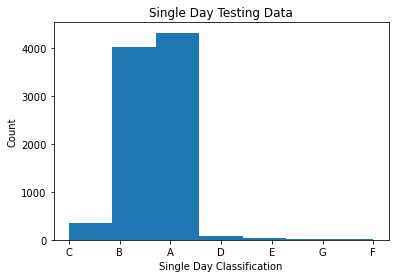

In [27]:
test_y_counter = collections.Counter(test_class_y)
plt.hist(test_class_y, density=False, bins=7)  # `density=False` would make counts
plt.ylabel('Count')
plt.xlabel('Single Day Classification');
plt.title("Single Day Testing Data");

In [28]:
# Get Acres burned as the label for multi-day model
labels_reg_s = []
labels_class_s = []
firesizeclass_s = defaultdict(int)

for fire in fire_data_shorten:
    labels_reg_s.append(fire[fire_mapping['size']])
    size = fire[fire_mapping['size']] 
    if size < .25:
        firesizeclass_s['A'] += 1
        labels_class_s.append('A')
    elif size < 9.9:
        firesizeclass_s['B'] += 1
        labels_class_s.append('B')
    elif size < 99.9:
        firesizeclass_s['C'] += 1
        labels_class_s.append('C')
    elif size < 299.9:
        firesizeclass_s['D'] += 1
        labels_class_s.append('D')
    elif size < 999:
        firesizeclass_s['E'] += 1
        labels_class_s.append('E')
    elif size < 4999:
        firesizeclass_s['F'] += 1
        labels_class_s.append('F')
    else:
        firesizeclass_s['G'] += 1
        labels_class_s.append('G')

print(firesizeclass)            # Shows key-value pairs of class to number of fires in class

defaultdict(<class 'int'>, {'C': 1728, 'B': 19548, 'A': 22056, 'D': 401, 'E': 186, 'F': 121, 'G': 88})


In [29]:
# Split into training and test set (80% train, 20% test) for multi-day model
size = int(len(labels_reg_s) * .8)
train_indices_s = sample(range(len(labels_reg_s)), size)

train_X_s = np.take(data_shorten, train_indices_s, axis=0)
test_X_s = np.delete(data_shorten, train_indices_s, axis=0)

train_reg_y_s = np.take(labels_reg_s, train_indices_s)
test_reg_y_s = np.delete(labels_reg_s, train_indices_s)

train_class_y_s = np.take(labels_class_s, train_indices_s)
test_class_y_s = np.delete(labels_class_s, train_indices_s)

Like with our single day fires, we are showing the actual count when classified by the size indices on the muli-day fires.

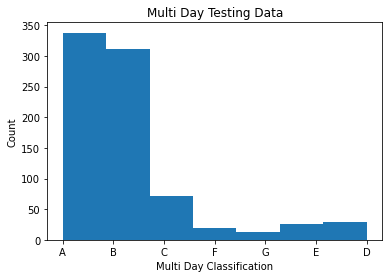

In [30]:
multi_test_y_counter = collections.Counter(test_class_y_s)
plt.hist(test_class_y_s, density=False, bins=7)  # `density=False` would make counts
plt.ylabel('Count')
plt.xlabel('Multi Day Classification');
plt.title("Multi Day Testing Data");

## Baseline Numbers

These baseline numbers were generated by creating naive models that simply predicted the average fire size for regression models and the mode for classification models. These baseline numbers will serve as a basis for our null hypothesis, which we are trying to beat with our actual models afterwards.

In [31]:
# Predict average fire size to emulate a naive regression model
average = sum(train_reg_y) / len(train_reg_y)

yPred = [average] * len(test_reg_y)

print(f"Baseline MSE: {mean_squared_error(test_reg_y, yPred)}")

Baseline MSE: 304341.30790146027


In [32]:
# Predict mode for classification to emulate a naive classification model
counts = defaultdict(int)
for label in train_class_y:
    counts[label] += 1
    
print(counts)    
mostCommonClass = max(counts, key=counts.get)
print(f"Most common class: {mostCommonClass}\n")

yPred = [mostCommonClass] * len(test_class_y)
print(f"Baseline classification accuracy: {accuracy_score(test_class_y, yPred)}")

defaultdict(<class 'int'>, {'B': 15534, 'A': 17735, 'C': 1385, 'E': 146, 'F': 96, 'D': 329, 'G': 77})
Most common class: A

Baseline classification accuracy: 0.48957625198277815


## Prediction models

Two models were tested over single and multi-day datasets: linear regression and logistic regression. Linear regression attempts to find a linear correlation within the data and predict a continuous value for its final fire-size prediction. Logistic regression uses a "One vs Rest" approach to predict a classification for each wildfire. 

To avoid multicollinearity and auto-correlation, we are running linear and logistic regression on each environmental factor
separately, and to prove our hypothesis, predict precipitation to have the largest coefficient of determination. 

All of our plots highlight the environmental variable: precipitation

### First-day

### Linear regression on each variable in the weather dataset with coefficient of determination and mean square error printed

In [33]:

for i in range(len(train_X[0])):
    
    tmp_train_X = [[x[i]] for x in train_X]
    tmp_test_X = [[x[i]] for x in test_X]
    
    reg = LinearRegression().fit(tmp_train_X, train_reg_y)
    yPred = reg.predict(tmp_test_X)
    
    # For data visualization
    if(i == 1):
        yPred_precip = yPred
    
    print(idx_to_weather[i])
    print(f"R^2 {reg.score(tmp_train_X, train_reg_y)}")
    print(f"MSE {mean_squared_error(test_reg_y, yPred)}")
    print()

ETo (in)
R^2 0.00031351362823739404
MSE 306707.8080937803

Precip (in)
R^2 1.4846885849961744e-05
MSE 304641.21905683406

Sol Rad (Ly/day)
R^2 7.082433511784725e-05
MSE 305375.6659400808

Avg Vap Pres (mBars)
R^2 1.540761802465429e-05
MSE 304179.23965651816

Max Air Temp (F)
R^2 0.0006710341664939445
MSE 307272.5256873111

Min Air Temp (F)
R^2 0.00019227735512505895
MSE 304406.06005797815

Avg Air Temp (F)
R^2 0.0005007535504887306
MSE 306070.3168332946

Max Rel Hum (%)
R^2 0.00024188898829258232
MSE 305757.14362953586

Min Rel Hum (%)
R^2 0.00023437378821233867
MSE 305746.15876601776

Avg Rel Hum (%)
R^2 0.00032268714781991115
MSE 306254.9713348204

Dew Point (F)
R^2 1.630716793599163e-05
MSE 304200.13249182847

Avg Wind Speed (mph)
R^2 1.792733095307142e-08
MSE 304344.5407877551

Wind Run (miles)
R^2 1.4229821465594483e-07
MSE 304351.24554503185

Avg Soil Temp (F)
R^2 0.00018847106466512997
MSE 304645.9317897108



MSE is nearly identical across all variables and precipitation does not have the highest R^2 value. Linear Regression does not show any significant differences between the environmental features and the relationship to the size of the fire.

### Retrieves the error on each individual regression analysis from what the value actually was in the testing data 

In [34]:
y_precip = []
for i in range(len(yPred_precip)):
    precip = abs(yPred_precip[i] - test_reg_y[i])
    y_precip.append(precip)

## Plotting Regression Error for Precipitation

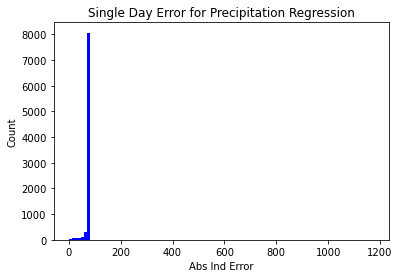

In [35]:
# Creating a plot to demonstrate the regression error for precipitation

yPlot = np.array(y_precip)
mu = np.mean(yPlot)
sigma = np.std(yPlot)
num_bins = 100

# Eliminates Outliers for a better appearing graph
distance_from_mean = abs(yPlot - mu)
max_deviations = 2
not_outlier = distance_from_mean < max_deviations * sigma
yPlot = yPlot[not_outlier]

# the histogram of the data
n, bins, patches = plt.hist(yPlot, num_bins, facecolor='blue', alpha=1)

plt.xlabel('Abs Ind Error')
plt.ylabel('Count')
plt.title(r'Single Day Error for Precipitation Regression')

plt.show()

Demonstrates how close or far the regression prediction was to actually predicting the size of an individual fire based off
of precipitation, and most are hovering around the same value. This is because the majority of fires were 1 acre or less and the average was in the 70's leading to this result. The average being skewed is attributed to large fire sizes. 

### Logistic Regression on each variable in the weather dataset and accuracy of the model is printed

In [36]:
lin_reg_counter = []
for i in range(len(train_X[0])):
    
    # For data Visualization
    if (i == 1):
        tmp_train_X = [[x[i]] for x in train_X]
        tmp_test_X = [[x[i]] for x in test_X]
    
        reg = LogisticRegression(C=1.5, max_iter = 10000).fit(tmp_train_X, train_class_y)
        yPred= reg.predict(tmp_test_X)
        yPred_precip = yPred
   
    else:
        tmp_train_X = [[x[i]] for x in train_X]
        tmp_test_X = [[x[i]] for x in test_X]

        reg = LogisticRegression(C=1.5, max_iter = 10000).fit(tmp_train_X, train_class_y)
        yPred= reg.predict(tmp_test_X)
    
    lin_reg_counter.append(collections.Counter(yPred))
    print(idx_to_weather[i])
    print(f"Accuracy {accuracy_score(test_class_y, yPred)}")
    print()
   

ETo (in)
Accuracy 0.4994334919555858

Precip (in)
Accuracy 0.48957625198277815

Sol Rad (Ly/day)
Accuracy 0.5055517788352595

Avg Vap Pres (mBars)
Accuracy 0.488216632676184

Max Air Temp (F)
Accuracy 0.49150237933378654

Min Air Temp (F)
Accuracy 0.48957625198277815

Avg Air Temp (F)
Accuracy 0.4892363471561296

Max Rel Hum (%)
Accuracy 0.48957625198277815

Min Rel Hum (%)
Accuracy 0.49014276002719237

Avg Rel Hum (%)
Accuracy 0.48957625198277815

Dew Point (F)
Accuracy 0.4886698391117154

Avg Wind Speed (mph)
Accuracy 0.4899161568094267

Wind Run (miles)
Accuracy 0.489689553591661

Avg Soil Temp (F)
Accuracy 0.4953546340358033



Based off of each environmental feature, how accurate the model was in correctly categorizing a fire to its classification label
The accuracy between each feature is essentially the same making it hard to determine if precipitation is better

### Histogram showing how many fires were categorized 

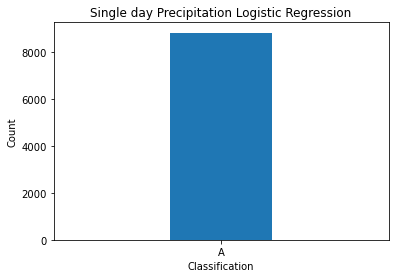

In [37]:
plt.hist(yPred_precip, density=False, bins=3)  # `density=False` would make counts
plt.ylabel('Count')
plt.xlabel('Classification');
plt.title("Single day Precipitation Logistic Regression");
plt.show()

All fires were categorized as A, which is clearly wrong and can be attributed to the fact that most fires in our data set are small in size with a few outlying large fires. This threw off our model making it less accurate

In [38]:
# Classification Grouping by the numbers
print("Testing Data Actual Counts: " + str(test_y_counter))
print()
print("Logistic Regression Counts:")
print()
for i in range(len(lin_reg_counter)):
    print(idx_to_weather[i])
    print(lin_reg_counter[i])

Testing Data Actual Counts: Counter({'A': 4321, 'B': 4014, 'C': 343, 'D': 72, 'E': 40, 'F': 25, 'G': 11})

Logistic Regression Counts:

ETo (in)
Counter({'A': 6967, 'B': 1859})
Precip (in)
Counter({'A': 8826})
Sol Rad (Ly/day)
Counter({'A': 6510, 'B': 2316})
Avg Vap Pres (mBars)
Counter({'A': 8669, 'B': 157})
Max Air Temp (F)
Counter({'A': 7714, 'B': 1112})
Min Air Temp (F)
Counter({'A': 8826})
Avg Air Temp (F)
Counter({'A': 8396, 'B': 430})
Max Rel Hum (%)
Counter({'A': 8826})
Min Rel Hum (%)
Counter({'A': 8796, 'B': 30})
Avg Rel Hum (%)
Counter({'A': 8826})
Dew Point (F)
Counter({'A': 8794, 'B': 32})
Avg Wind Speed (mph)
Counter({'A': 8632, 'B': 194})
Wind Run (miles)
Counter({'A': 8628, 'B': 198})
Avg Soil Temp (F)
Counter({'A': 8400, 'B': 426})


The output above displays: for each environment feature, the class predictions for the fires. They are heavily skewed towards class A fires. Large fires from C-G are such outliers that they are never predicted by our models. 

### Multi-day average (Only fires that lasted multiple days)

The code below is the same as single day, doing the exact same thing except it is for fires that lasted multiple days. This was done because of errors in our data set where many fires did not have an end date listed and we automatically had to refer them to single day.

This is why the observation count for multi day fires are significantly less than single day.

All the outputs and visualizations have the same meaning and value as the single day examples.

In [48]:
# Linear regression on each variable in the weather dataset

for i in range(len(train_X[0])):
    
    if (i == 1):
        tmp_train_X = [[x[i]] for x in train_X_s]
        tmp_test_X = [[x[i]] for x in test_X_s]
    
        reg = LinearRegression().fit(tmp_train_X, train_reg_y_s)
        yPred = reg.predict(tmp_test_X)
        yPred_precip = yPred
    else:
        tmp_train_X = [[x[i]] for x in train_X_s]
        tmp_test_X = [[x[i]] for x in test_X_s]
    
        reg = LinearRegression().fit(tmp_train_X, train_reg_y_s)
        yPred = reg.predict(tmp_test_X)
    
    print(idx_to_weather[i])
    print(f"R^2 {reg.score(tmp_train_X, train_reg_y_s)}")
    print(f"MSE {mean_squared_error(test_reg_y_s, yPred)}")
    print()

ETo (in)
R^2 0.0005347647703337621
MSE 12937068.234110506

Precip (in)
R^2 0.00011022807511273935
MSE 12958931.310124043

Sol Rad (Ly/day)
R^2 0.0005819530748399915
MSE 12956314.340135772

Avg Vap Pres (mBars)
R^2 0.00031385733568534135
MSE 13010771.521857144

Max Air Temp (F)
R^2 4.329868292796135e-07
MSE 12954592.49075299

Min Air Temp (F)
R^2 0.0003474751626885153
MSE 12978252.14938133

Avg Air Temp (F)
R^2 9.466733187024623e-05
MSE 12958637.719557356

Max Rel Hum (%)
R^2 8.506644191130786e-05
MSE 12986725.830249378

Min Rel Hum (%)
R^2 0.00011344842826876977
MSE 12980562.915962093

Avg Rel Hum (%)
R^2 0.00013646657942312235
MSE 12995286.113852309

Dew Point (F)
R^2 0.000409058122924133
MSE 13027321.63600831

Avg Wind Speed (mph)
R^2 0.00020575994383675855
MSE 12922550.930353712

Wind Run (miles)
R^2 0.00020486947318232307
MSE 12922582.889030896

Avg Soil Temp (F)
R^2 4.3639747890011904e-05
MSE 12960403.04375344



In [47]:
y_precip = []
for i in range(len(yPred_precip)):
    precip = abs(yPred_precip[i] - test_reg_y_s[i])
    y_precip.append(precip)

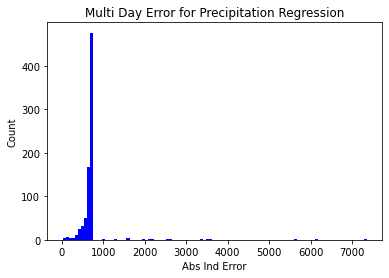

In [41]:
yPlot = np.array(y_precip)
mu = np.mean(yPlot)
sigma = np.std(yPlot)
num_bins = 100
distance_from_mean = abs(yPlot - mu)
max_deviations = 2
not_outlier = distance_from_mean < max_deviations * sigma
yPlot = yPlot[not_outlier]

# the histogram of the data
n, bins, patches = plt.hist(yPlot, num_bins, facecolor='blue', alpha=1)

plt.xlabel('Abs Ind Error')
plt.ylabel('Count')
plt.title(r'Multi Day Error for Precipitation Regression')

# Tweak spacing to prevent clipping of ylabel

plt.show()

Our MSE scores for multi-day predictions were extremely bad, hovering around 12.9 million mean-squared-error. This can be attributed how many small fires only lasted a single day while large fires last multiple days. However, a large majroity of the fires in the dataset burned very little land, resulting in a small average area burned but a handful of extremely large outliers that skewed the mean-squared-error.

In [42]:
# Logistic Regression on each variable in the weather dataset
lin_reg_counter = []
for i in range(len(train_X[0])):
    if (i == 1):
        tmp_train_X = [[x[i]] for x in train_X_s]
        tmp_test_X = [[x[i]] for x in test_X_s]
    
        reg = LogisticRegression(C=1.5, max_iter = 10000).fit(tmp_train_X, train_class_y_s)
        yPred= reg.predict(tmp_test_X)
        yPred_precip = yPred
        
    else:
        tmp_train_X = [[x[i]] for x in train_X_s]
        tmp_test_X = [[x[i]] for x in test_X_s]
    
        reg = LogisticRegression(C=1.5, max_iter = 10000).fit(tmp_train_X, train_class_y_s)
        yPred= reg.predict(tmp_test_X)
    lin_reg_counter.append(collections.Counter(yPred))
    print(idx_to_weather[i])
    print(f"Accuracy {accuracy_score(test_class_y_s, yPred)}")
    print()

ETo (in)
Accuracy 0.4183168316831683

Precip (in)
Accuracy 0.4183168316831683

Sol Rad (Ly/day)
Accuracy 0.4183168316831683

Avg Vap Pres (mBars)
Accuracy 0.4306930693069307

Max Air Temp (F)
Accuracy 0.41955445544554454

Min Air Temp (F)
Accuracy 0.4282178217821782

Avg Air Temp (F)
Accuracy 0.42698019801980197

Max Rel Hum (%)
Accuracy 0.4183168316831683

Min Rel Hum (%)
Accuracy 0.4183168316831683

Avg Rel Hum (%)
Accuracy 0.4183168316831683

Dew Point (F)
Accuracy 0.4319306930693069

Avg Wind Speed (mph)
Accuracy 0.4183168316831683

Wind Run (miles)
Accuracy 0.4183168316831683

Avg Soil Temp (F)
Accuracy 0.42574257425742573



Because there are multiple days being taken into consideration, there are more factors that cannot be accounted for by a single environmental factor, thereby reducing the accuracy of the prediction model.

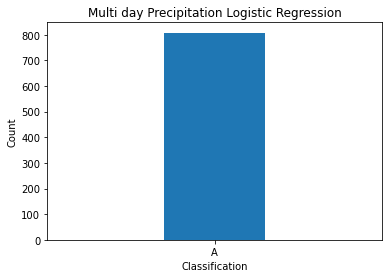

In [43]:
plt.hist(yPred_precip, density=False, bins=3)  # `density=False` would make counts
plt.ylabel('Count')
plt.xlabel('Classification');
plt.title("Multi day Precipitation Logistic Regression");
plt.show()

In [44]:
# Classification Grouping by the numbers
print("Testing Data Actual Counts: " + str(multi_test_y_counter))
print()
print("Logistic Regression Counts:")
for i in range(len(lin_reg_counter)):
    print(lin_reg_counter[i])

Testing Data Actual Counts: Counter({'A': 338, 'B': 312, 'C': 71, 'D': 29, 'E': 25, 'F': 20, 'G': 13})

Logistic Regression Counts:
Counter({'A': 808})
Counter({'A': 808})
Counter({'A': 805, 'B': 3})
Counter({'A': 757, 'B': 51})
Counter({'A': 797, 'B': 11})
Counter({'A': 758, 'B': 50})
Counter({'A': 783, 'B': 25})
Counter({'A': 808})
Counter({'A': 808})
Counter({'A': 808})
Counter({'A': 735, 'B': 73})
Counter({'A': 808})
Counter({'A': 808})
Counter({'A': 785, 'B': 23})


In [45]:
print(f"Length of shortened dataset: {len(data_shorten)}")
print(f"Average distance to closest active station: {sum(distances) / len(distances)} degrees")

Length of shortened dataset: 4039
Average distance to closest active station: 0.7853511701977343 degrees


# Ethics & Privacy

We found our data sets mainly from Kaggle and CIMIS. The data from Kaggle and CIMIS are publicly available and open source. Privacy concerns are mainly tied to individuals and our data would focus on locations and environmental factors, therefore there is no need to censor any information from our data sets. The map showing the location of the weather stations is also publicly available as with the latitude and longitude values, so there are no privacy concerns in our project when displaying our information. 

Government organizations may have biases in their data recordings, since their grant money or funding might be dependent on the data they report. However, the biases in these data sets should not be significant enough to invalidate the results and our project showed that the weather conditions we highlighted were not enough alone to determine the size of a fire. 

However, ethics should be considered more than privacy when handling our analysis. Our analysis would be mainly focused in California and there is a risk that the results can be improperly generalized to describe all areas that are prone to wildfires. Another ethic concern that emerges from our analysis is that insurance companies can use it to justify jacking up prices for areas that are more prone to wildfire.
We handled all of these concerns by reviewing the datasets and finding out where it was sourced to ensure the data wasn’t collected in a malicious manner. Kaggle is a public website but reading the reviews from other people before gathering the data is crucial to ensure we are working with data that is ethical and not collected in a malicious manner. 


# Conclusion & Discussion

With all of us being from Norcal, we thought it would be important to highlight the potential factors that could influence a fire’s maximum size. We looked at 14 variables that could potentially impact fire size:  reference crop evapotranspiration, precipitation, solar radiation, average vaporization pressure, minimum air temperature, maximum air temperature, average air temperature, maximum relative humidity, minimum relative humidity, average relative humidity, dew point, average wind speed, wind run (“amount” of wind that passes through the station every hour), and average soil temperature. These were taken from a CIMIS.gov, where for each individual variable there exists a daily value.

To obtain wildfire information, Kaggle had a dataset with 1.88 million fires over the last 25 years in the US. We narrowed it down to California and combined the fire data with the environmental data from CIMIS. This provided a close estimate of the weather conditions to the location of a fire and gave us the most accurate information possible. Using these datasets, we were able to get all the weather conditions for each fire everyday that it occured. 

We had a few limitations during our project. The first was that an overwhelming majority of the fires were small in size and only lasted for a day. This led to our data being skewed by a few massive fires that affected our prediction models. Another issue is that in our database, many fires did not have an end date listed. We knew that the fires had been contained but unfortunately there was only the start date to go off of. Because of this we had to do two separate models, one for single day fires and one for multi day fires and partition our datasets accordingly. 

Running the Regression and Classification models brought out results we were not expecting. Because the majority of fires were so small in size, our models were unable accurately to predict neither the final size of the fire nor the class of the fire. As a result, it would only classify them as either A or B size, or the two smallest models. When we predicted the actual acres using Regression (because of the few large fires that had burned thousands of acres) a fire that was only 1 acre in actuality was often predicted to be 50-60 acres. 

As unfortunate as our findings were, all of us came to realize that there is much more that goes into the spread of wildfires than we had thought. All of us also wanted to remind ourselves and anyone who could potentially view our project about wildfire safety in California coming off the wake of a devastating wildfire season. 



# Team Contributions

All team members contributed equally and there were no interruptions during the project. 